<a href="https://colab.research.google.com/github/NurAnnisa-NA23/Jawaban-UTS/blob/main/20222014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UTS Pengolahan Data Sistem Fisis

Nur Annisa (20222014)

A. FFT Audio

Berkas WAV: note_08_20222014

1. Ukuran berkas: 352844 bytes
2. Durasi audio yang tersimpan pada berkas: 4s
3. Sample rate berkas audio yang tersimpan pada berkas: 44100 Hz


In [60]:
#Import dan baca file audio

from scipy.io import wavfile
from IPython.display import Audio, display
from scipy.fft import rfft, rfftfreq
import matplotlib.pyplot as plt
import numpy as np


from google.colab import files
uploaded = files.upload()


# define filename
fname = 'note_08_20222014.wav'

# read file
if fname:
    sample_rate, data = wavfile.read(fname)
    print("Sample rate=", sample_rate)
    print(data)

if fname:
    display(Audio(fname, autoplay=False))

Saving note_08_20222014.wav to note_08_20222014.wav
Sample rate= 44100
[     0   3758   7464 ... -11068  -7464  -3758]


Nsample = 176400


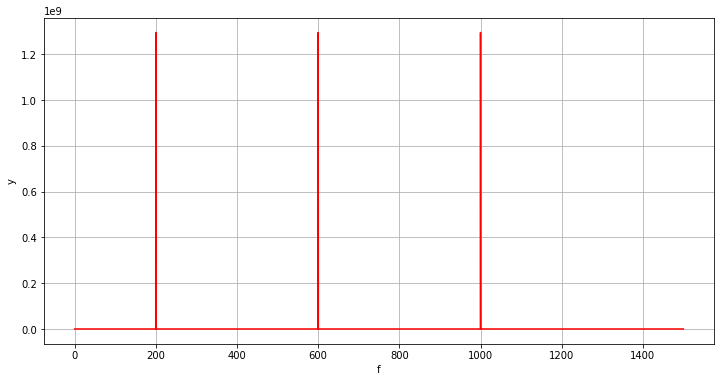

In [67]:
#Lakukan FFT pada data

Nsample = len(data)
print("Nsample =", Nsample)

yf = rfft(data)
xf = rfftfreq(Nsample, 1/ sample_rate)

# plot signal in frequency domain
plt.figure(figsize=(12, 6))
plt.grid()
plt.xlabel('f')
plt.ylabel('y')
plt.plot(xf[:6000], np.abs(yf[:6000]), 'r-') #pilih jumlah data xf dan yf sehingga mencakup seluruh frekuensi yang mungkin muncul
plt.show()


Dari grafik tampak nilai frekuensi masing-masing gelombang penyusun audio yakni pada 200 Hz, 600 Hz, dan 1000 Hz

B. FFT Citra

1. Ukuran berkas: 2179 bytes
2. Ukuran Citra yang tersimpan dalam berkas: width = 100, height = 100
3. Format pixel citra yang tersimpan dalam berkas: RGBA


Saving 20222014.png to 20222014.png
width = 100
height = 100
RGBA


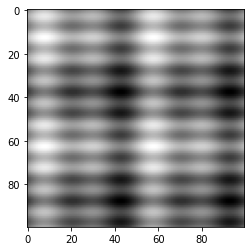

In [24]:
#import dan baca file citra

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

ifname = "20222014.png"
im_in = plt.imread(ifname).astype(float)
height = len(im_in)
width = len(im_in[0])
print("width =", width)
print("height =", height)

img = Image.open(ifname)
print(img.mode)

plt.imshow(im_in)
plt.show()


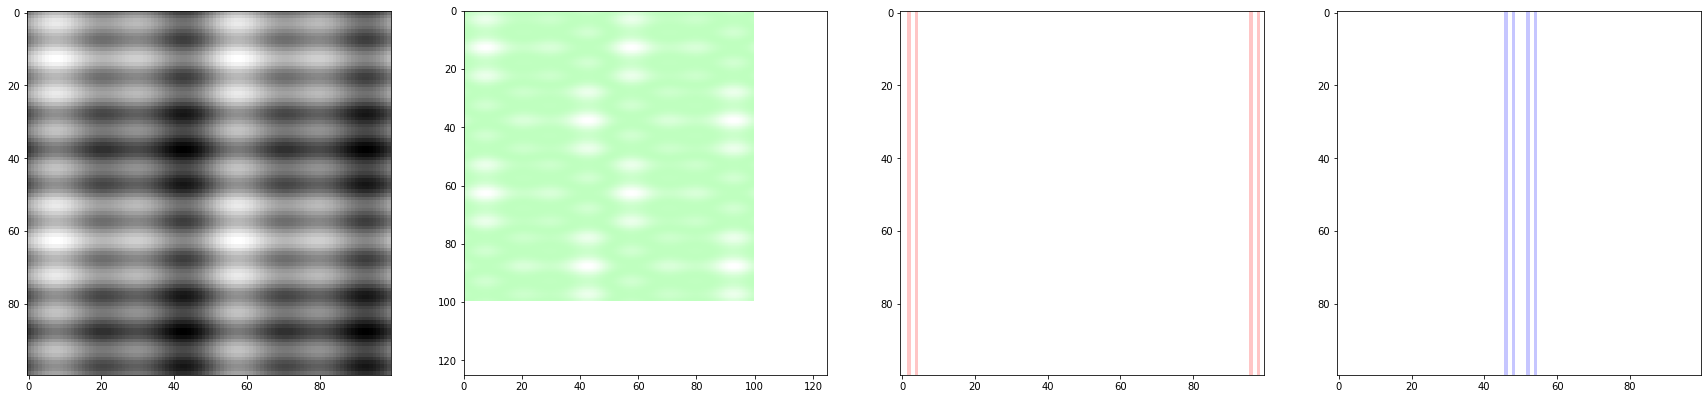

In [66]:
#Lakukan FFT 2-D menggunakan ifftshift dan fft2 dari numpy.fft

#Menghitung FT dari citra


ft = np.fft.ifftshift(im_in)            #inverse dari fftshift (menggeser ke tepi)
ft1 = np.fft.fft2(ft, norm ="ortho")    #dilakukan FFT 2-D
ft2 = np.fft.fftshift(ft1)              #pergeseran komponen frekuensi tidak nol ke tengah spektrum (untuk visualisasi)

plt.figure(figsize=(30, 20))
plt.subplot(141)
plt.imshow(im_in)

plt.subplot(142)
plt.imshow(abs(ft))
plt.xlim([0,125]) #ukuran maksimal data yakni width: 100
plt.ylim([125,0])

plt.subplot(143)
plt.imshow(abs(ft1))

plt.subplot(144)
plt.imshow(abs(ft2))

plt.show()


Hasil FFT 2D yang ditampilkan oleh plot ke-3 diperoleh frekuensi ruang untuk sumbu-x yaitu k = 1.5,3,87, 88.5. Sementara untuk sumbu-y frekuensi ruangnya berada pada seluruh nilai dari 0-100.

In [46]:
Percobaan menggunakan modul fftpack dari scipy

#perform fast fourier transform
from scipy import fftpack
from matplotlib import cm, colors

ofname_fft = "20222014.png"

im_fft = np.abs(fftpack.fft2(im_in))
im_fft_normalize = im_fft.astype('uint8')
plt.imsave(ofname_fft, im_fft_normalize, cmap='gray', format='PNG')
 

width = 100
height = 100


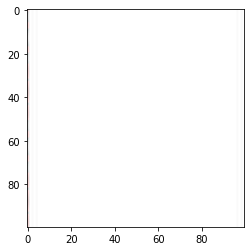

In [47]:
#read images from file

ifname_fft = f"{ofname_fft}"
im_in_fft = plt.imread(ifname_fft).astype(float)
height = len(im_in_fft)
width =  len(im_in_fft[0])
print("width =", width)
print("height =", height)

plt.imshow(im_in_fft)
plt.show()


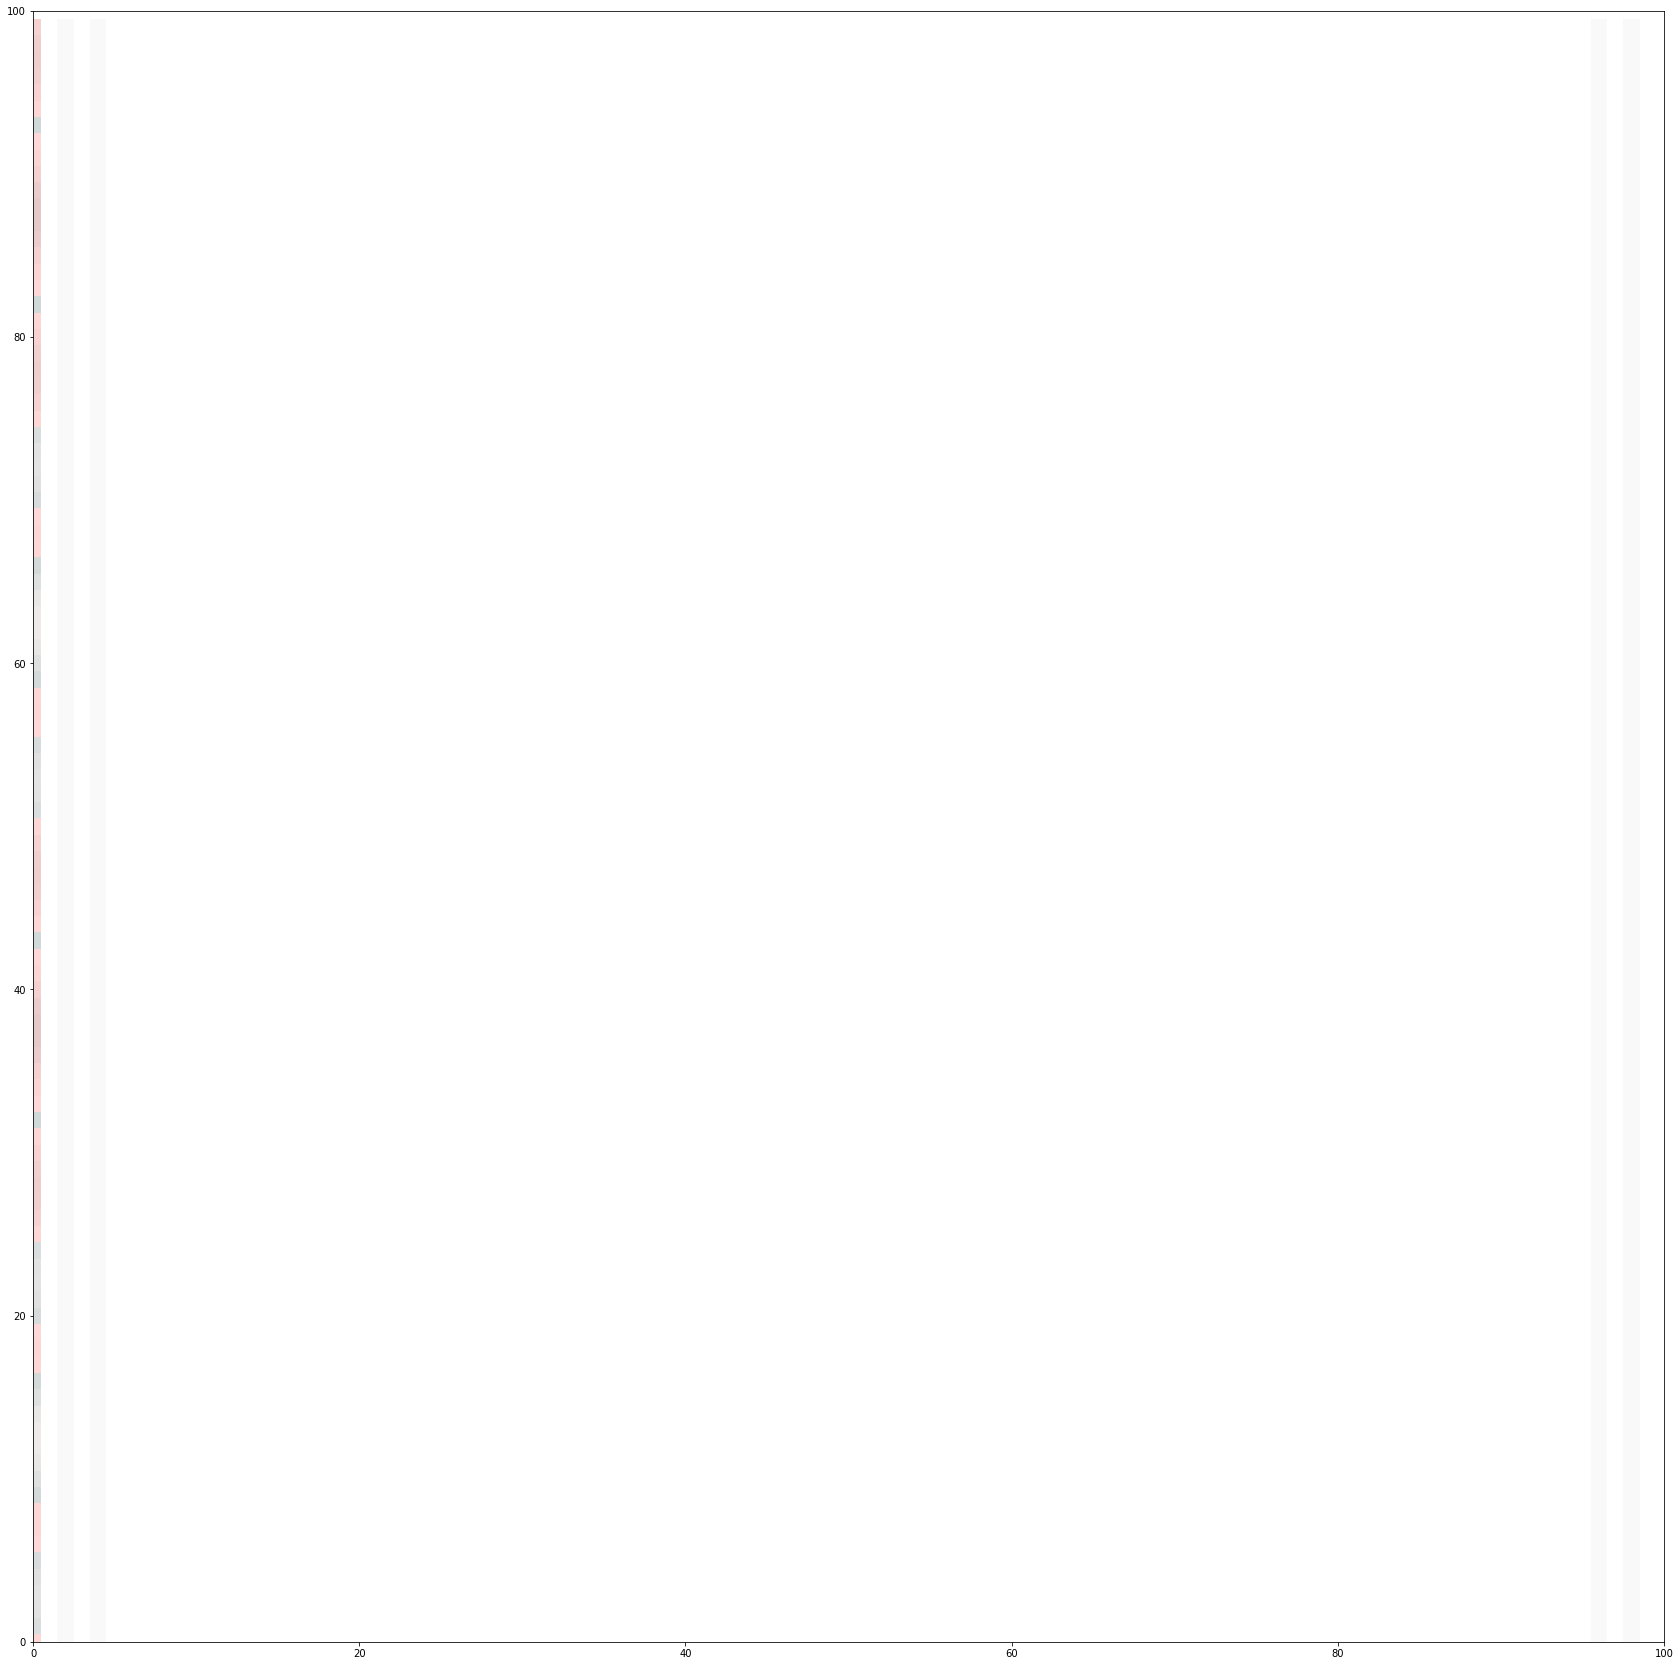

In [48]:
plt.figure(figsize=(30, 30))
plt.xlim([0,100])
plt.ylim([0,100])
plt.imshow(im_in_fft)
plt.show()

Pada plot hasil FFT tampak frekuensi spasial memiliki beberapa nilai di sumbu y.